In [1]:
# Import the needed packages
# Numpy
import numpy as np
# Matplotlib
import matplotlib.pyplot as plt
# Dymola Interface
from dymola.dymola_interface import DymolaInterface
# Import modelicares for result files
import modelicares as mres
# OS for file
import os
# Define the stability check
def checkStability(y,u,dmax = 5.):
    if np.max(abs(y-u))<dmax:
        return True
    else:
        return False

# Set Plot Style
plt.style.use('seaborn-paper')

# Dymola Interface

# Simulation Setup
sim_time = 1200 # Simulation time
sim_dt = 1e-3 # Fixed Step Size
sim_tol = 1e-7 # Solver tolerance
sim_int = 800 # Solver intervals
dk_m = 0.05 # Incremental for gain

# Start the interface
dymola = DymolaInterface(use64bit=True, showwindow = False)

# Open the model
dymola.openModel(path = "../Modelica/Rosenbrock_Gain.mo")

True

In [2]:
## EXPLORATION

## DECENTRALIZED

# Set the initial gain
k_m = 1.-dk_m
# Set the initial boolean for stability
stability = True

while stability:
    # Incremental increase of the gain
    k_m = k_m + dk_m
    # Simulation Model
    dymola.simulateExtendedModel("Rosenbrock_Gain.Decentralized",
                                startTime = 0.0,
                                stopTime = sim_time,
                                numberOfIntervals = sim_int,
                                outputInterval = 1.0,
                                method = "Dassl",
                                tolerance = sim_tol,
                                fixedstepsize = sim_dt,
                                resultFile = "../Python/Decentral_Gain",
                                initialNames = ["K_11.k","K_22.k"],
                                initialValues = [k_m,k_m],
                                finalNames = ["y_1","y_2","u_1","u_2"],
                                autoLoad = True)
    # Evaluation
    # Open result file
    res, lins = mres.load("../Python/Decentral_Gain.mat")
    # Get the arrays
    y1 = res["y_1"].values()[0]
    u1 = res["u_1"].values()[0]
    y2 = res["y_2"].values()[0]
    u2 = res["u_2"].values()[0]
    # Check if system is stable
    stability = checkStability(y1,u1, 20) and checkStability(y2,u2,20)
    # Delete result file
    os.remove('../Python/Decentral_Gain.mat')
    # Delete the array
    if stability:
        del y1,y2,u1,u2
    if not stability:
        # Store the last stable value
        k_m_D = k_m - dk_m
        print(k_m_D)
    #print(k_m, stability)
    if k_m > 100:
        print("Limit reached!")
        break

## STATIC DECOUPLED

# Set the initial gain
k_m = 1-dk_m
# Set the initial boolean for stability
stability = True

while stability:
    # Incremental increase of the gain
    k_m = k_m + dk_m
    # Simulation Model
    dymola.simulateExtendedModel("Rosenbrock_Gain.Static_Decoupling",
                                startTime = 0.0,
                                stopTime = sim_time,
                                numberOfIntervals = sim_int,
                                outputInterval = 1.0,
                                method = "Dassl",
                                tolerance = sim_tol,
                                fixedstepsize = sim_dt,
                                resultFile = "../Python/Static_Gain",
                                initialNames = ["K_11.k","K_22.k"],
                                initialValues = [k_m,k_m],
                                finalNames = ["y_1","y_2","u_1","u_2"],
                                autoLoad = True)
    # Evaluation
    # Open result file
    res, lins = mres.load("../Python/Static_Gain.mat")
    mres.closeall()
    # Get the arrays
    y1 = res["y_1"].values()[0]
    u1 = res["u_1"].values()[0]
    y2 = res["y_2"].values()[0]
    u2 = res["u_2"].values()[0]
    # Check if system is stable
    stability = checkStability(y1,u1, 20) and checkStability(y2,u2,20)
    # Delete result file
    os.remove('../Python/Static_Gain.mat')
    # Delete the array
    if stability:
        del y1,y2,u1,u2
    if not stability:
        # Store the last stable value
        k_m_SS = k_m - dk_m
        print(k_m_SS)
    #print(k_m, stability)
    if k_m > 100:
        break

## DYNAMIC DECOUPLED

# Set the initial gain
k_m = 1-dk_m
# Set the initial boolean for stability
stability = True

while stability:
    # Incremental increase of the gain
    k_m = k_m + dk_m
    # Simulation Model
    dymola.simulateExtendedModel("Rosenbrock_Gain.Dynamic_Decoupling",
                                startTime = 0.0,
                                stopTime = sim_time,
                                numberOfIntervals = sim_int,
                                outputInterval = 1.0,
                                method = "Dassl",
                                tolerance = sim_tol,
                                fixedstepsize = sim_dt,
                                resultFile = "../Python/Dynamic_Gain",
                                initialNames = ["K_11.k","K_22.k"],
                                initialValues = [k_m,k_m],
                                finalNames = ["y_1","y_2","u_1","u_2"],
                                autoLoad = True)
    # Evaluation
    # Open result file
    res, lins = mres.load("../Python/Dynamic_Gain.mat")
    mres.closeall()
    # Get the arrays
    y1 = res["y_1"].values()[0]
    u1 = res["u_1"].values()[0]
    y2 = res["y_2"].values()[0]
    u2 = res["u_2"].values()[0]
    # Check if system is stable
    stability = checkStability(y1,u1, 20) and checkStability(y2,u2,20)
    # Delete result file
    os.remove('../Python/Dynamic_Gain.mat')
    # Delete the array
    if stability:
        del y1,y2,u1,u2
    if not stability:
        # Store the last stable value
        k_m_SD = k_m - dk_m
        print(k_m_SD)
    #print(k_m, stability)
    if k_m > 100:
        break

## MULTIVARIABLE PID

# Set the initial gain
k_m = 1-dk_m
# Set the initial boolean for stability
stability = True

while stability:
    # Incremental increase of the gain
    k_m = k_m + dk_m
    # Simulation Model
    dymola.simulateExtendedModel("Rosenbrock_Gain.CentralizedPID",
                                startTime = 0.0,
                                stopTime = sim_time,
                                numberOfIntervals = sim_int,
                                outputInterval = 1.0,
                                method = "Dassl",
                                tolerance = sim_tol,
                                fixedstepsize = sim_dt,
                                resultFile = "../Python/PID_Gain",
                                initialNames = ["K_11.k","K_22.k"],
                                initialValues = [k_m,k_m],
                                finalNames = ["y_1","y_2","u_1","u_2"],
                                autoLoad = True)
    # Evaluation
    # Open result file
    res, lins = mres.load("../Python/PID_Gain.mat")
    mres.closeall()
    # Get the arrays
    y1 = res["y_1"].values()[0]
    u1 = res["u_1"].values()[0]
    y2 = res["y_2"].values()[0]
    u2 = res["u_2"].values()[0]
    # Check if system is stable
    stability = checkStability(y1,u1, 20) and checkStability(y2,u2,20)
    # Delete result file
    os.remove('../Python/PID_Gain.mat')
    # Delete the array
    if stability:
        del y1,y2,u1,u2
    if not stability:
        # Store the last stable value
        k_m_CP = k_m - dk_m
        print(k_m_CP)
    #print(k_m, stability)
    if k_m > 100:
        break

1.25
4.25
4.25
5.1


In [3]:
## EVALUATION OF AMPLITUDE MARGIN
""" Check with a value of 3 -> since 3 != current_k *alpha <-> alpha = 3 / current_k"""
k_D = k_m_D/ 3.0
k_SS = k_m_SS / 3.0
k_SD = k_m_SD / 3.0
k_CP = k_m_CP / 3.0

# Simulation Setup
sim_time = 1200 # Simulation time
sim_dt = 1e-1 # Fixed Step Size
sim_tol = 1e-7 # Solver tolerance
sim_int = 2400 # Solver intervals

## Decentralized
# Simulation Model
dymola.simulateExtendedModel("Rosenbrock_Gain.Decentralized",
                                startTime = 0.0,
                                stopTime = sim_time,
                                numberOfIntervals = sim_int,
                                outputInterval = sim_dt,
                                method = "Dassl",
                                tolerance = sim_tol,
                                fixedstepsize = sim_dt,
                                resultFile = "../Data/Rosenbrock/Decentral_K",
                                initialNames = ["K_11.k","K_22.k"],
                                initialValues = [k_D,k_D],
                                finalNames = ["y_1","y_2","u_1","u_2", "IAE_1.y", "IAE_2.y", "IE_1", "IE_2"],
                                autoLoad = True)
dymola.simulateExtendedModel("Rosenbrock_Gain.Static_Decoupling",
                                startTime = 0.0,
                                stopTime = sim_time,
                                numberOfIntervals = sim_int,
                                outputInterval = sim_dt,
                                method = "Dassl",
                                tolerance = sim_tol,
                                fixedstepsize = sim_dt,
                                resultFile = "../Data/Rosenbrock/Static_K",
                                initialNames = ["K_11.k","K_22.k"],
                                initialValues = [k_SS,k_SS],
                                finalNames = ["y_1","y_2","u_1","u_2", "IAE_1.y", "IAE_2.y", "IE_1", "IE_2"],
                                autoLoad = True)
dymola.simulateExtendedModel("Rosenbrock_Gain.Dynamic_Decoupling",
                                startTime = 0.0,
                                stopTime = sim_time,
                                numberOfIntervals = sim_int,
                                outputInterval = sim_dt,
                                method = "Dassl",
                                tolerance = sim_tol,
                                fixedstepsize = sim_dt,
                                resultFile = "../Data/Rosenbrock/Dynamic_K",
                                initialNames = ["K_11.k","K_22.k"],
                                initialValues = [k_SD,k_SD],
                                finalNames = ["y_1","y_2","u_1","u_2", "IAE_1.y", "IAE_2.y", "IE_1", "IE_2"],
                                autoLoad = True)
dymola.simulateExtendedModel("Rosenbrock_Gain.CentralizedPID",
                                startTime = 0.0,
                                stopTime = sim_time,
                                numberOfIntervals = sim_int,
                                outputInterval = sim_dt,
                                method = "Dassl",
                                tolerance = sim_tol,
                                fixedstepsize = sim_dt,
                                resultFile = "../Data/Rosenbrock/CentralizedPID_K",
                                initialNames = ["K_11.k","K_22.k"],
                                initialValues = [k_CP,k_CP],
                                finalNames = ["y_1","y_2","u_1","u_2", "IAE_1.y", "IAE_2.y", "IE_1", "IE_2"],
                                autoLoad = True)

# Close Dymola
dymola.close()

0

In [4]:
# Load the results

# Decentralized
res, lins = mres.load("../Data/Rosenbrock/Decentral_K.mat")
y1_D = res["y_1"].values()[0]
y2_D = res["y_2"].values()[0]
u1_D = res["u_1"].values()[0]
u2_D = res["u_2"].values()[0]
IAE1_D = res["IAE_1.y"].values()[0]
IAE2_D = res["IAE_2.y"].values()[0]
IE1_D = res["IE_1.y"].values()[0]
IE2_D = res["IE_2.y"].values()[0]
time_D = res["Time"].values()[0]
# Static
res, lins = mres.load("../Data/Rosenbrock/Static_K.mat")
y1_S = res["y_1"].values()[0]
y2_S = res["y_2"].values()[0]
u1_S = res["u_1"].values()[0]
u2_S = res["u_2"].values()[0]
IAE1_S = res["IAE_1.y"].values()[0]
IAE2_S = res["IAE_2.y"].values()[0]
IE1_S = res["IE_1.y"].values()[0]
IE2_S = res["IE_2.y"].values()[0]
time_S = res["Time"].values()[0]
# Dynamic
res, lins = mres.load("../Data/Rosenbrock/Dynamic_K.mat")
y1_SD = res["y_1"].values()[0]
y2_SD = res["y_2"].values()[0]
u1_SD = res["u_1"].values()[0]
u2_SD = res["u_2"].values()[0]
IAE1_SD = res["IAE_1.y"].values()[0]
IAE2_SD = res["IAE_2.y"].values()[0]
IE1_SD = res["IE_1.y"].values()[0]
IE2_SD = res["IE_2.y"].values()[0]
time_SD = res["Time"].values()[0]
# Centralized
res, lins = mres.load("../Data/Rosenbrock/CentralizedPID_K.mat")
y1_C = res["y_1"].values()[0]
y2_C = res["y_2"].values()[0]
u1_C = res["u_1"].values()[0]
u2_C = res["u_2"].values()[0]
IAE1_C = res["IAE_1.y"].values()[0]
IAE2_C = res["IAE_2.y"].values()[0]
IE1_C = res["IE_1.y"].values()[0]
IE2_C = res["IE_2.y"].values()[0]
time_C = res["Time"].values()[0]

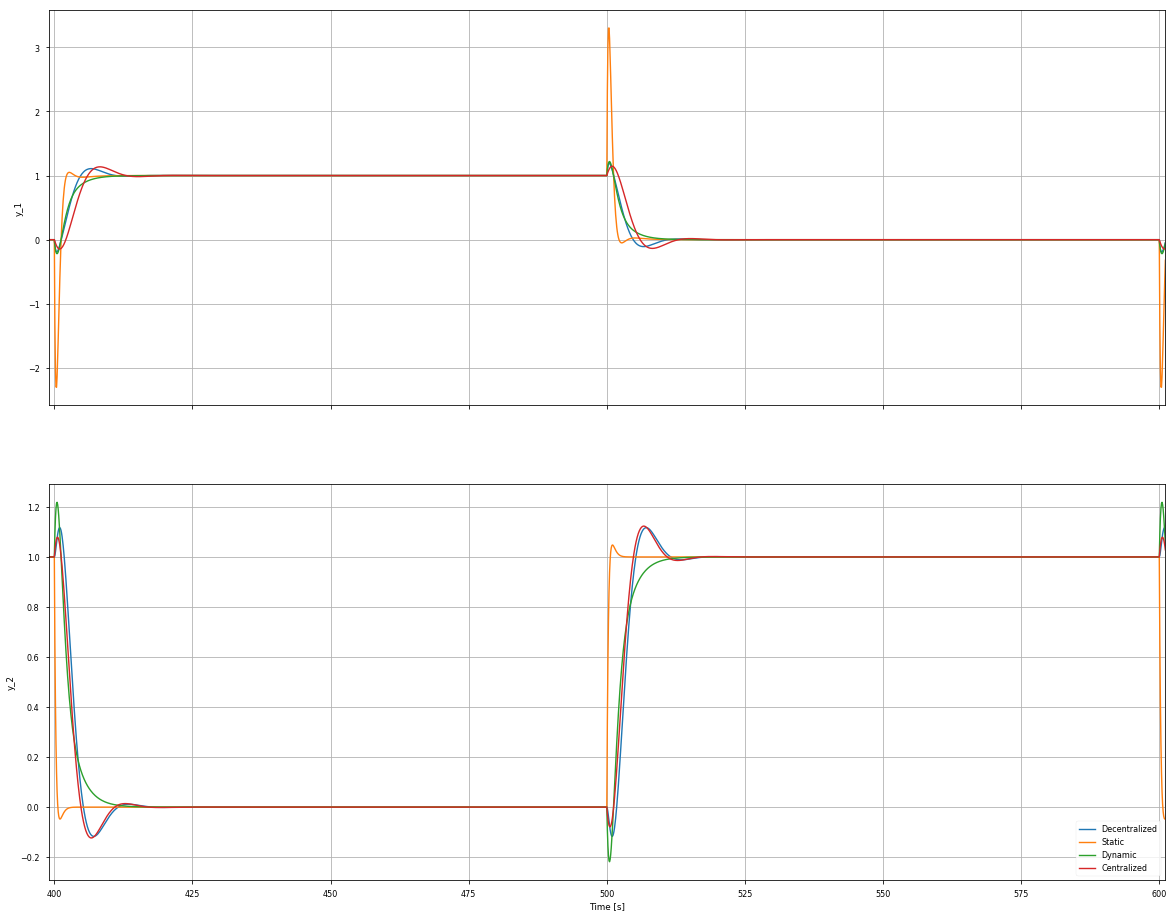

In [5]:
# Plot the Data
plt.clf()
fig, ax = plt.subplots(2, sharex = True, figsize = (20,16))

ax[0].plot(time_D,y1_D, label = "Decentralized")
ax[0].plot(time_S,y1_S, label = "Static")
ax[0].plot(time_SD,y1_SD, label = "Dynamic")
ax[0].plot(time_C,y1_C, label = "Centralized")

ax[1].plot(time_D,y2_D, label = "Decentralized")
ax[1].plot(time_S,y2_S, label = "Static")
ax[1].plot(time_SD,y2_SD, label = "Dynamic")
ax[1].plot(time_C,y2_C, label = "Centralized")

ax[1].legend()
ax[0].set_ylabel('y_1')
ax[0].grid(True)
ax[1].set_ylabel('y_2')
ax[1].set_xlabel('Time [s]')
ax[1].grid(True)
ax[0].set_xlim([399,601])
plt.savefig("../Images/Rosenbrock_Gain.png")
plt.show()

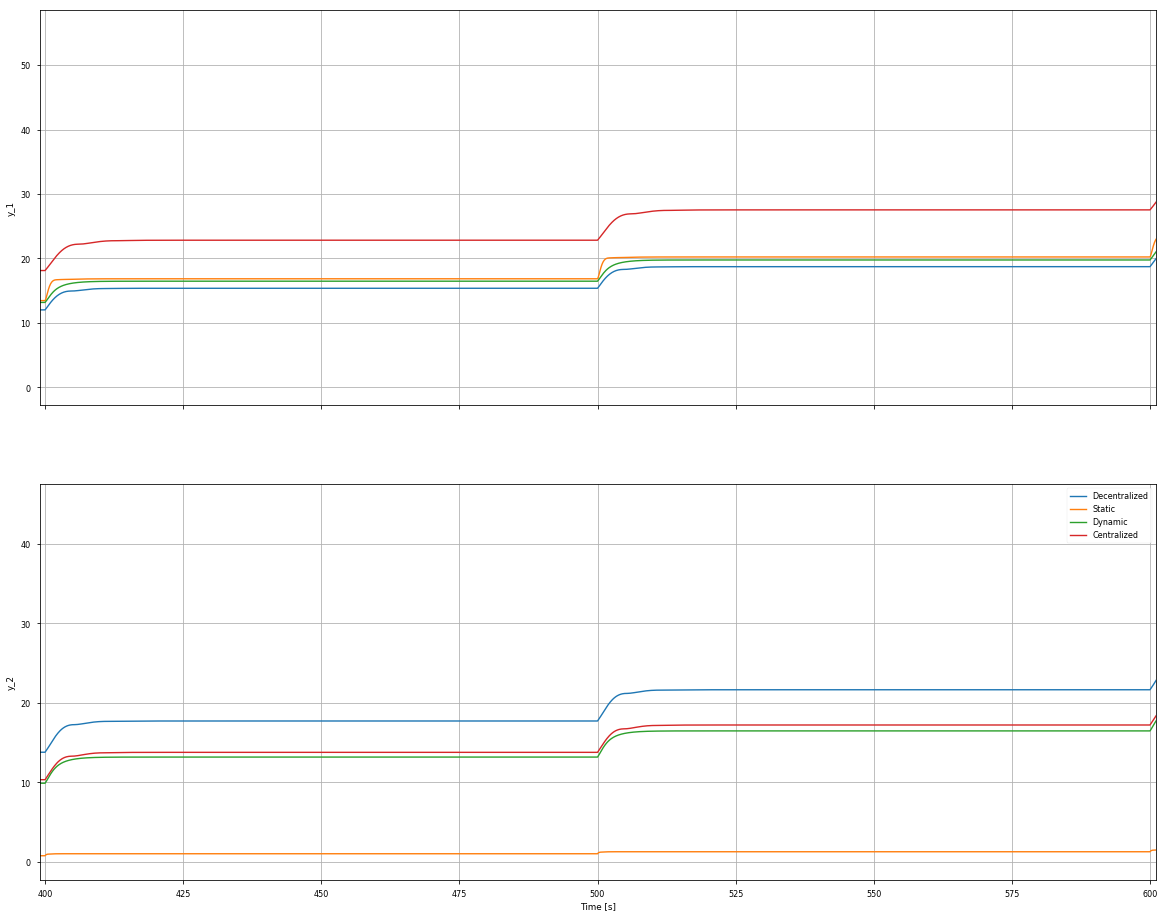

In [6]:
# Plot the Data
plt.clf()
fig, ax = plt.subplots(2, sharex = True, figsize = (20,16))

ax[0].plot(time_D,IAE1_D, label = "Decentralized")
ax[0].plot(time_S,IAE1_S, label = "Static")
ax[0].plot(time_SD,IAE1_SD, label = "Dynamic")
ax[0].plot(time_C,IAE1_C, label = "Centralized")

ax[1].plot(time_D,IAE2_D, label = "Decentralized")
ax[1].plot(time_S,IAE2_S, label = "Static")
ax[1].plot(time_SD,IAE2_SD, label = "Dynamic")
ax[1].plot(time_C,IAE2_C, label = "Centralized")

ax[1].legend()
ax[0].set_ylabel('y_1')
ax[0].grid(True)
ax[1].set_ylabel('y_2')
ax[1].set_xlabel('Time [s]')
ax[1].grid(True)
ax[0].set_xlim([399,601])
plt.savefig("../Images/Rosenbrock_Gain_IAE.png")
plt.show()

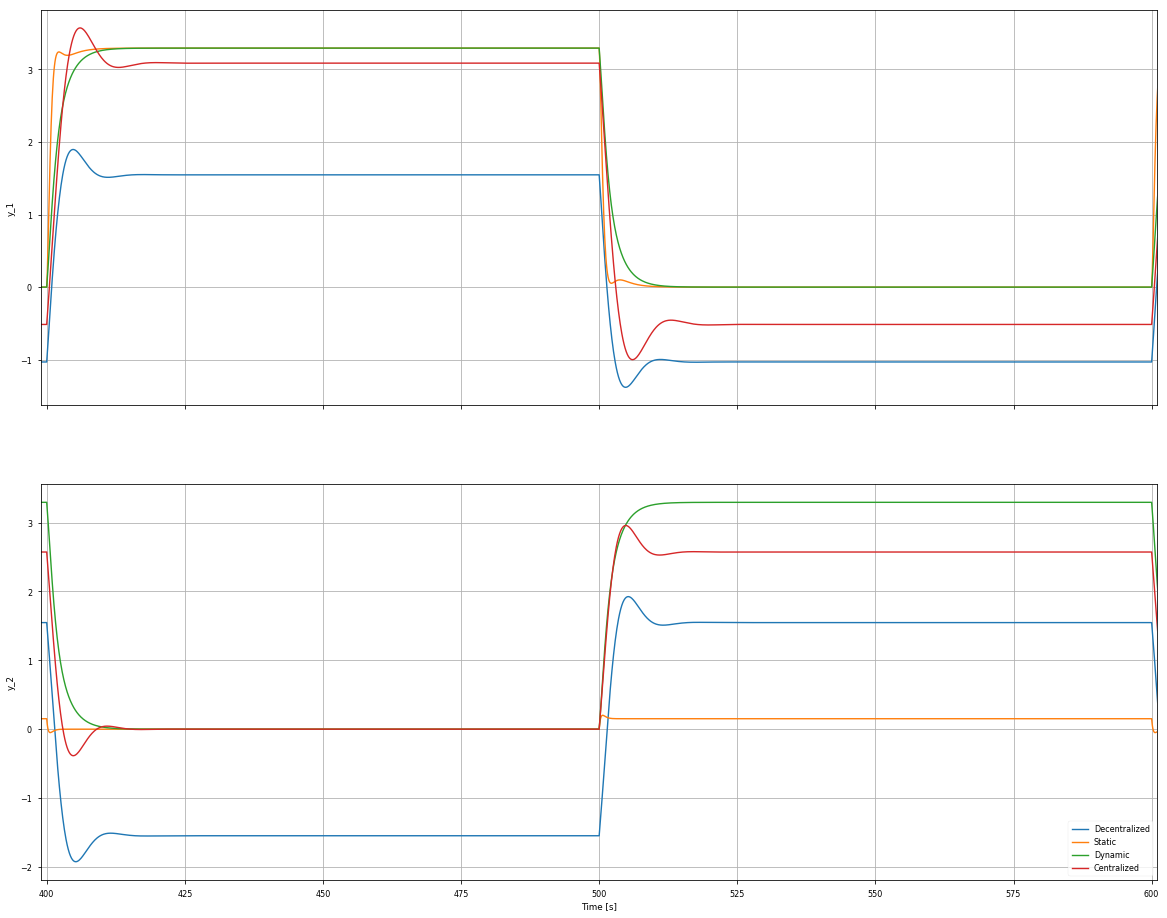

In [7]:
# Plot the Data
plt.clf()
fig, ax = plt.subplots(2, sharex = True, figsize = (20,16))

ax[0].plot(time_D,IE1_D, label = "Decentralized")
ax[0].plot(time_S,IE1_S, label = "Static")
ax[0].plot(time_SD,IE1_SD, label = "Dynamic")
ax[0].plot(time_C,IE1_C, label = "Centralized")

ax[1].plot(time_D,IE2_D, label = "Decentralized")
ax[1].plot(time_S,IE2_S, label = "Static")
ax[1].plot(time_SD,IE2_SD, label = "Dynamic")
ax[1].plot(time_C,IE2_C, label = "Centralized")

ax[1].legend()
ax[0].set_ylabel('y_1')
ax[0].grid(True)
ax[1].set_ylabel('y_2')
ax[1].set_xlabel('Time [s]')
ax[1].grid(True)
ax[0].set_xlim([399,601])
plt.savefig("../Images/Rosenbrock_Gain_IE.png")
plt.show()